<a href="https://colab.research.google.com/github/fiofana/bootcamp-data-analytics/blob/main/stats/Exerc%C3%ADcio_Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios). Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

In [119]:
populacao_df = pd.read_csv('populacao_brasileira.csv')
populacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [120]:
populacao_df

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...,...
995,995,AC,22,Médio,Básico,2852.40,F
996,996,PE,40,Fundamental,Básico,2533.96,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,998,RS,61,Fundamental,Avançado,3513.60,F


In [121]:
# Como a coluna Unnamed é igual ao index, podemos dropar
populacao_df = populacao_df.drop(columns='Unnamed: 0')

In [122]:
populacao_df

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...
995,AC,22,Médio,Básico,2852.40,F
996,PE,40,Fundamental,Básico,2533.96,M
997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,RS,61,Fundamental,Avançado,3513.60,F


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [123]:
total_pessoas = populacao_df.shape[0]
pessoas_fluentes = populacao_df[populacao_df['nível de proficiência em inglês'] == 'Avançado'].shape[0]
prob_complementar = 1 - (pessoas_fluentes / total_pessoas)

print(f'A probabilidade complementar de pessoas fluentes é {(prob_complementar * 100):.2f}%.')

A probabilidade complementar de pessoas fluentes é 65.60%.


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [124]:
pop_al_pa = populacao_df[populacao_df['estado'].isin(['AL', 'PA'])]
pop_al_pa_renda_maior_5k = pop_al_pa[pop_al_pa['renda'] > 5000].shape[0]
prob_renda_maior_5k = pop_al_pa_renda_maior_5k / pop_al_pa.shape[0]

print(f'A probabilidade de uma pessoa de AL ou PA ter renda maior que 5k é de {(prob_renda_maior_5k * 100):.2f}%.')

A probabilidade de uma pessoa de AL ou PA ter renda maior que 5k é de 5.06%.


3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [125]:
pop_am = populacao_df[populacao_df['estado'] == 'AM']
pop_am_ensino_superior = pop_am[pop_am['escolaridade'] == 'Superior'].shape[0]
prob_ens_superior = pop_am_ensino_superior / pop_am.shape[0]

print(f'A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de {prob_renda_maior_5k:.2f}%.')

# Distribuição geométrica de 4 pessoas não ter ensino superior, e a 5a ter
prob_nao_ens_superior = 1 - prob_ens_superior
prob_5_pessoa = (prob_nao_ens_superior ** 4) * prob_ens_superior
print(f'A probabilidade de uma quinta pessoa amazonense ter ensino superior completo é de {prob_5_pessoa:.2f}%.')

A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de 0.05%.
A probabilidade de uma quinta pessoa amazonense ter ensino superior completo é de 0.08%.


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [126]:
tam_faixa = 1500
renda_min = populacao_df['renda'].min()
renda_max = populacao_df['renda'].max()

faixas_renda = pd.cut(populacao_df['renda'], bins=np.arange(renda_min, renda_max, tam_faixa))
faixa_mais_comum = faixas_renda.value_counts().idxmax()

print(f'A faixa de renda mais comum é de {faixa_mais_comum}.')

A faixa de renda mais comum é de (1603.74, 3103.74].


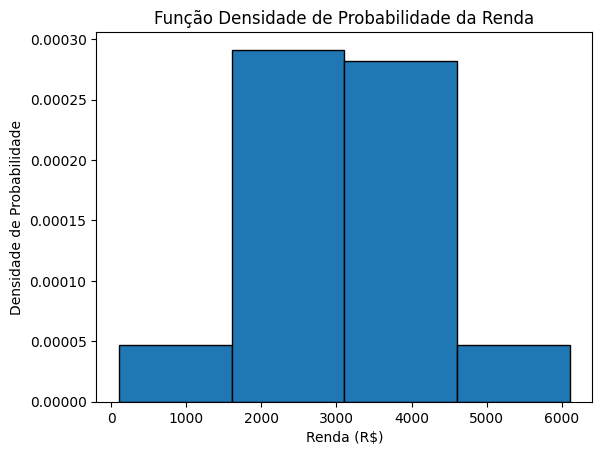

In [127]:
# Estimativa da função densidade de probabilidade separada nas faixas de R$1500
bins = np.arange(renda_min, renda_max + tam_faixa, tam_faixa)
plt.hist(populacao_df['renda'], bins=bins, density=True, edgecolor='black')

plt.title('Função Densidade de Probabilidade da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')

plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [128]:
media_renda = populacao_df['renda'].mean()
variancia_renda = populacao_df['renda'].var()
desvio_renda = np.sqrt(variancia_renda)

print(f'A média da renda é {media_renda:.2f}, com variância de {variancia_renda:.2f} e desvio padrãoi de {desvio_renda:.2f}.')

A média da renda é 3082.54, com variância de 993156.23 e desvio padrãoi de 996.57.


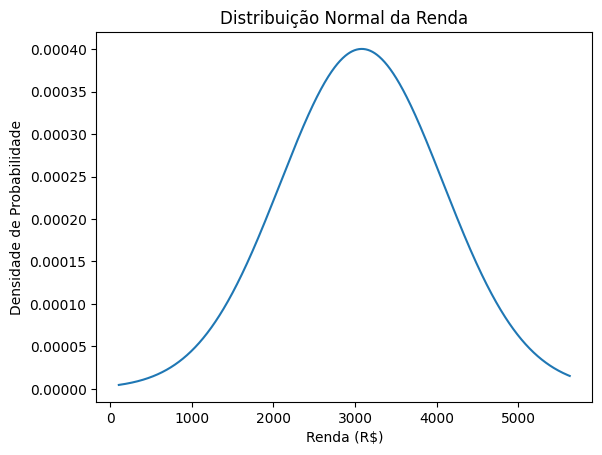

In [129]:
# Distribuição normal
x = np.linspace(populacao_df['renda'].min(), populacao_df['renda'].max(), 1000)
funcao_densidade_normal = norm.pdf(x, media_renda, desvio_renda)

plt.plot(x, funcao_densidade_normal)

plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')

plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [130]:
pop_pos_graduacao = (populacao_df['escolaridade'] == 'Superior').sum()
prob_pos_graduacao = (pop_pos_graduacao / total_pessoas)

print(f'A probabilidade no conjunto de pessoas com escolaridade de pós-graduação é de {(prob_pos_graduacao * 100):.2f}%.')

n_amostra = 1000000
k_pos_graduacao = 243000
prob_pos_graduacao_binom = binom.pmf(k_pos_graduacao, n_amostra, prob_pos_graduacao)

print(f'A probabilidade de 243 mil pessoas com pós-graduação na população é de {(prob_pos_graduacao_binom * 100):.3f}%.')

A probabilidade no conjunto de pessoas com escolaridade de pós-graduação é de 24.30%.
A probabilidade de 243 mil pessoas com pós-graduação na população é de 0.093%.


7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

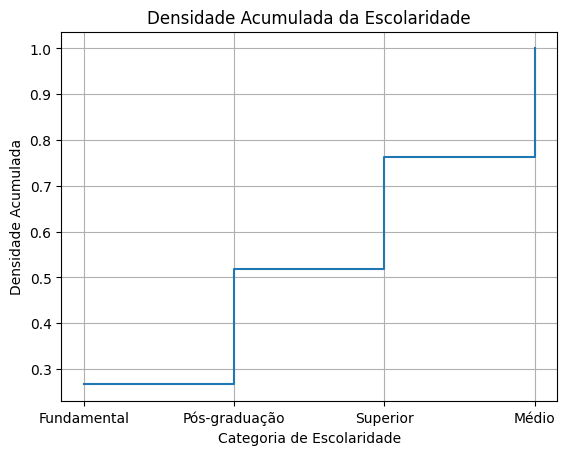

In [131]:
densidade_acumulada = populacao_df['escolaridade'].value_counts(normalize=True).cumsum()

plt.step(densidade_acumulada.index, densidade_acumulada, where='post')

plt.title('Densidade Acumulada da Escolaridade')
plt.xlabel('Categoria de Escolaridade')
plt.ylabel('Densidade Acumulada')
plt.xticks(ticks=range(len(densidade_acumulada.index)), labels=densidade_acumulada.index)

plt.grid(True)
plt.show()

8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [132]:
n_intermediario = populacao_df[populacao_df['nível de proficiência em inglês'] == 'Intermediário'].shape[0]
p_intermediario = n_intermediario / total_pessoas
z_score = 1.96  # 95% confiança
margem_erro = z_score * np.sqrt((p_intermediario * (1 - p_intermediario)) / total_pessoas)

print(f'A margem de erro amostral para inglês intermediário é {margem_erro:.3f}.')

A margem de erro amostral para inglês intermediário é 0.029.


9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [133]:
encontrar_pessoas = 60
encontrar_renda = media_renda + 1000

# Supondo distribuição binomial
prop_renda_acima_media = 1 - norm.cdf(encontrar_renda, media_renda, desvio_renda)

populacao_60 = binom.pmf(encontrar_pessoas, total_pessoas, prop_renda_acima_media)

print(f'A probabilidade de de encontrar 60 pessoas com uma renda mil reais superior à média é de {(populacao_60 * 100):.2e}%.')

A probabilidade de de encontrar 60 pessoas com uma renda mil reais superior à média é de 1.16e-19%.


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [134]:
sudeste = populacao_df['estado'].isin(['SP', 'RJ', 'MG'])
total_sudeste = sudeste.sum()

condicoes = (populacao_df['sexo'] == 'M') & \
            (populacao_df['escolaridade'] == 'Fundamental') & \
            (populacao_df['renda'] > 2000)
sudeste_cond = sudeste & condicoes
total_condicoes_sudeste = sudeste_cond.sum()

prob_sudeste = total_condicoes_sudeste / total_sudeste

print(f'A probabilidade de escolher uma pessoa com essas características é de {(prob_sudeste * 100):.2f}%.')

A probabilidade de escolher uma pessoa com essas características é de 10.43%.
